In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
np.random.seed(2343243)

In [4]:
mean_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 100)

In [5]:
mean_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mean_vec2, cov_mat2, 100)

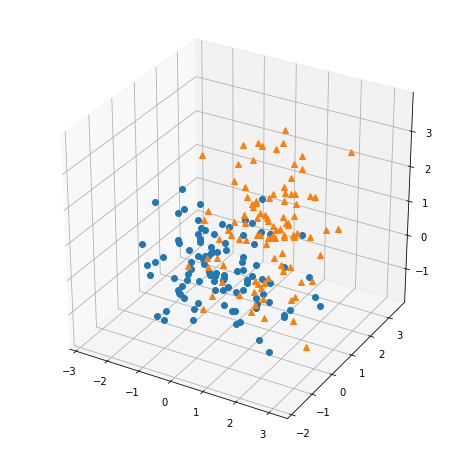

In [6]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(class1[:, 0], class1[:, 1], class1[:, 2], 'o')
ax.plot(class2[:, 0], class2[:, 1], class2[:, 2], '^')
plt.show()

In [11]:
all_data = np.concatenate((class1, class2))

In [10]:
pca = PCA(n_components = 2)
transformed_data = pca.fit_transform(all_data)
transformed_data

array([[-0.52351425, -0.63301617],
       [-0.78786184,  0.94206431],
       [-1.28725924,  0.54439067],
       [ 0.66747707,  1.69846274],
       [-1.74150174, -0.755306  ],
       [-1.03559449, -1.53950125],
       [-0.21765053, -0.85555712],
       [-0.7648506 , -0.46590375],
       [-0.64255217,  1.16920769],
       [-0.5783154 , -0.30888845],
       [ 0.25251683, -0.38101091],
       [-0.26298255, -0.44282938],
       [-0.86147962,  0.21339394],
       [-0.9917517 , -0.32293363],
       [-1.3133147 ,  0.01268907],
       [-1.09145198, -0.50248537],
       [-2.05840949, -1.13678107],
       [-0.62975084, -1.78591257],
       [-1.75005325, -1.27909834],
       [-0.66142546,  1.66188479],
       [-0.34624366,  0.47524286],
       [ 0.77989322,  0.76153114],
       [-0.22203858, -0.7362751 ],
       [-1.06469867,  0.33693758],
       [-1.93640401, -0.97234577],
       [-2.44237038, -0.34276504],
       [-1.7918403 ,  0.40615644],
       [ 0.33656537,  1.36869154],
       [-1.38894876,

In [12]:
pca.components_

array([[ 0.41124564,  0.64810013,  0.64097055],
       [ 0.91063567, -0.26106644, -0.32029202]])

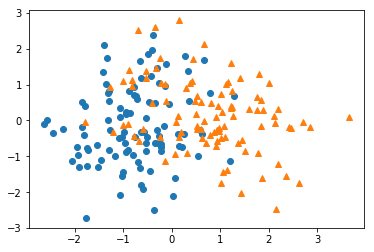

In [13]:
plt.plot(transformed_data[0:100,0],transformed_data[0:100,1],"o")
plt.plot(transformed_data[100:200,0],transformed_data[100:200,1],"^")
plt.show()

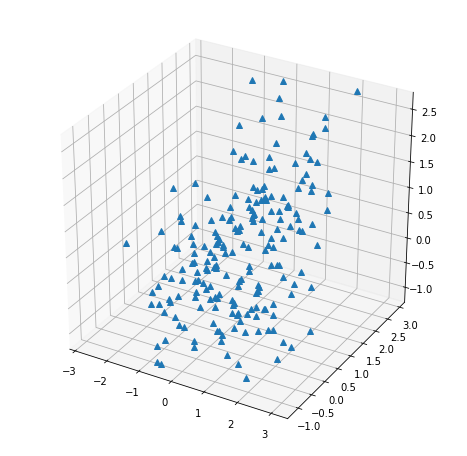

In [14]:
X_approx = pca.inverse_transform(transformed_data)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(X_approx[:, 0], X_approx[:, 1], X_approx[:, 2], '^')
plt.show()

In [15]:
a = -0.409689
b = 7.2827
c = - 7.1008
i = 10
a * X_approx[i][0] + b* X_approx[i][1] + c * X_approx[i][2]

1.0000358864489653

## Own PCA code

In [17]:
all_data_t=all_data.T
cov=np.cov(all_data_t)
cov

array([[1.14139998, 0.1061989 , 0.0918139 ],
       [0.1061989 , 1.11579657, 0.27166986],
       [0.0918139 , 0.27166986, 1.11826602]])

In [18]:
np.linalg.eig(cov)

(array([1.45186534, 1.07866114, 0.8449361 ]),
 array([[ 0.41124564,  0.91063567,  0.0402454 ],
        [ 0.64810013, -0.26106644, -0.71540934],
        [ 0.64097055, -0.32029202,  0.69754554]]))

In [19]:
eig_val,eig_vectors=np.linalg.eig(cov)

In [20]:
eig_val_vector_pair=[]
for i in range(len(eig_val)):
    eig_vec=eig_vectors[:,i]
    eig_val_vector_pair.append((eig_val[i],eig_vec))

In [21]:
eig_val_vector_pair.sort(reverse=True)
eig_val_vector_pair

[(1.45186534173593, array([0.41124564, 0.64810013, 0.64097055])),
 (1.078661140197859, array([ 0.91063567, -0.26106644, -0.32029202])),
 (0.8449360955327049, array([ 0.0402454 , -0.71540934,  0.69754554]))]